In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR']="/gdrive/MyDrive/Kaggle"

In [3]:
%cd "/gdrive/MyDrive/Kaggle"

/gdrive/MyDrive/Kaggle


In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk("/gdrive/MyDrive/Kaggle/autonomous-driving"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

Streaming output truncated to the last 5000 lines.
/gdrive/MyDrive/Kaggle/autonomous-driving/train_images/ID_2158dbe98.jpg
/gdrive/MyDrive/Kaggle/autonomous-driving/train_images/ID_215b3b227.jpg
/gdrive/MyDrive/Kaggle/autonomous-driving/train_images/ID_215c46b7e.jpg
/gdrive/MyDrive/Kaggle/autonomous-driving/train_images/ID_21706bdeb.jpg
/gdrive/MyDrive/Kaggle/autonomous-driving/train_images/ID_21889c910.jpg
/gdrive/MyDrive/Kaggle/autonomous-driving/train_images/ID_218d1a24a.jpg
/gdrive/MyDrive/Kaggle/autonomous-driving/train_images/ID_2199b4c9f.jpg
/gdrive/MyDrive/Kaggle/autonomous-driving/train_images/ID_21aa717ed.jpg
/gdrive/MyDrive/Kaggle/autonomous-driving/train_images/ID_21b599c7e.jpg
/gdrive/MyDrive/Kaggle/autonomous-driving/train_images/ID_21d0be356.jpg
/gdrive/MyDrive/Kaggle/autonomous-driving/train_images/ID_21eca2583.jpg
/gdrive/MyDrive/Kaggle/autonomous-driving/train_images/ID_2205f49b3.jpg
/gdrive/MyDrive/Kaggle/autonomous-driving/train_images/ID_220644160.jpg
/gdrive/MyDri

In [6]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img
from math import sin, cos
from PIL import ImageDraw, Image
import cv2

In [7]:
train = pd.read_csv('/gdrive/MyDrive/Kaggle/autonomous-driving/train.csv')
# k is camera instrinsic matrix
k = np.array([[2304.5479, 0,  1686.2379],
           [0, 2305.8757, 1354.9849],
           [0, 0, 1]], dtype=np.float32)

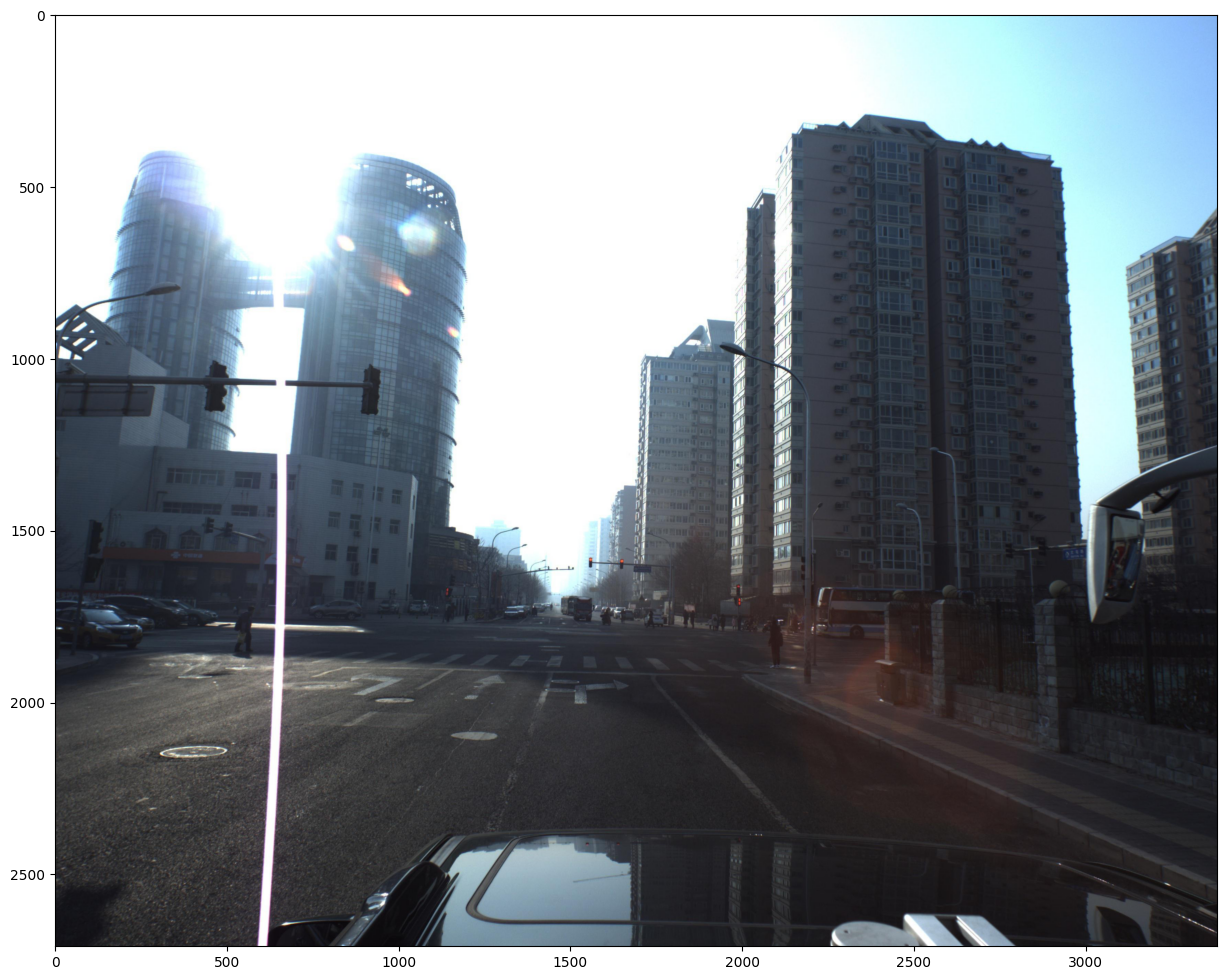

In [8]:
plt.rcParams["axes.grid"] = False
img_name = train.loc[10]['ImageId']
pred_string = train.loc[10]['PredictionString']
fig, ax = plt.subplots(figsize=(15, 15))
img = load_img('/gdrive/MyDrive/Kaggle/autonomous-driving/train_images/' + img_name + '.jpg')
plt.imshow(img)
plt.show()

In [9]:
items = pred_string.split(' ')
model_types, yaws, pitches, rolls, xs, ys, zs = [items[i::7] for i in range(7)]

In [10]:
# convert euler angle to rotation matrix
def euler_to_Rot(yaw, pitch, roll):
    Y = np.array([[cos(yaw), 0, sin(yaw)],
                  [0, 1, 0],
                  [-sin(yaw), 0, cos(yaw)]])
    P = np.array([[1, 0, 0],
                  [0, cos(pitch), -sin(pitch)],
                  [0, sin(pitch), cos(pitch)]])
    R = np.array([[cos(roll), -sin(roll), 0],
                  [sin(roll), cos(roll), 0],
                  [0, 0, 1]])
    return np.dot(Y, np.dot(P, R))

In [11]:
def draw_line(image, points):
    color = (255, 0, 0)
    cv2.line(image, tuple(points[1][:2]), tuple(points[2][:2]), color, 16)
    cv2.line(image, tuple(points[1][:2]), tuple(points[4][:2]), color, 16)

    cv2.line(image, tuple(points[1][:2]), tuple(points[5][:2]), color, 16)
    cv2.line(image, tuple(points[2][:2]), tuple(points[3][:2]), color, 16)
    cv2.line(image, tuple(points[2][:2]), tuple(points[6][:2]), color, 16)
    cv2.line(image, tuple(points[3][:2]), tuple(points[4][:2]), color, 16)
    cv2.line(image, tuple(points[3][:2]), tuple(points[7][:2]), color, 16)

    cv2.line(image, tuple(points[4][:2]), tuple(points[8][:2]), color, 16)
    cv2.line(image, tuple(points[5][:2]), tuple(points[8][:2]), color, 16)

    cv2.line(image, tuple(points[5][:2]), tuple(points[6][:2]), color, 16)
    cv2.line(image, tuple(points[6][:2]), tuple(points[7][:2]), color, 16)
    cv2.line(image, tuple(points[7][:2]), tuple(points[8][:2]), color, 16)
    return image


def draw_points(image, points):
    image = np.array(image)
    for (p_x, p_y, p_z) in points:
        # print("p_x, p_y", p_x, p_y)
        cv2.circle(image, (p_x, p_y), 5, (255, 0, 0), -1)
    return image

In [12]:
# image coordinate to world coordinate
def img_cor_2_world_cor():
    x_img, y_img, z_img = img_cor_points[0]
    xc, yc, zc = x_img*z_img, y_img*z_img, z_img
    p_cam = np.array([xc, yc, zc])
    xw, yw, zw = np.dot(np.linalg.inv(k), p_cam)
    print(xw, yw, zw)
    print(x, y, z)

-23.647900411624185 6.4268495104928975 34.4336
-23.6479 6.42685 34.4336
2.2084804480113815 18.256398494458487 104.341
2.20848 18.2564 104.341
-24.890700323200242 10.490499043450752 65.1451
-24.8907 10.4905 65.1451
-28.1337004618649 7.985179294988766 48.2766
-28.1337 7.98518 48.2766
-26.13410043494914 7.142889367439083 43.293
-26.1341 7.14289 43.293
-20.8158003642163 5.195859569438906 29.8138
-20.8158 5.19586 29.8138


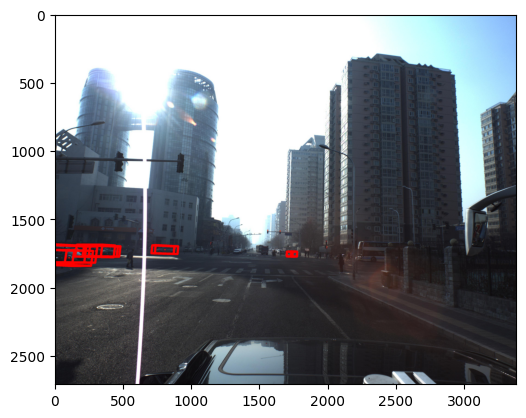

In [13]:
x_l = 1.02
y_l = 0.80
z_l = 2.31
for yaw, pitch, roll, x, y, z in zip(yaws, pitches, rolls, xs, ys, zs):
    yaw, pitch, roll, x, y, z = [float(x) for x in [yaw, pitch, roll, x, y, z]]
    # I think the pitch and yaw should be exchanged
    yaw, pitch, roll = -pitch, -yaw, -roll
    Rt = np.eye(4)
    t = np.array([x, y, z])
    Rt[:3, 3] = t
    Rt[:3, :3] = euler_to_Rot(yaw, pitch, roll).T
    Rt = Rt[:3, :]
    P = np.array([[0, 0, 0, 1],
                  [x_l, y_l, -z_l, 1],
                  [x_l, y_l, z_l, 1],
                  [-x_l, y_l, z_l, 1],
                  [-x_l, y_l, -z_l, 1],
                  [x_l, -y_l, -z_l, 1],
                  [x_l, -y_l, z_l, 1],
                  [-x_l, -y_l, z_l, 1],
                  [-x_l, -y_l, -z_l, 1]]).T
    img_cor_points = np.dot(k, np.dot(Rt, P))
    img_cor_points = img_cor_points.T
    img_cor_points[:, 0] /= img_cor_points[:, 2]
    img_cor_points[:, 1] /= img_cor_points[:, 2]
    # call this function before chage the dtype
    img_cor_2_world_cor()
    img_cor_points = img_cor_points.astype(int)
    img = draw_points(img, img_cor_points)
    img = draw_line(img, img_cor_points)
    
img = Image.fromarray(img)
plt.imshow(img)
plt.show()